###   <span style = "color:red">About this dataset:</span>



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from matplotlib import colormaps

In [3]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import precision_score, recall_score, confusion_matrix,\
classification_report, accuracy_score, f1_score, log_loss, jaccard_score


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
columns = df.columns
i = 0
for column in columns:
    if df[column].dtypes == object:
        i += 1
print("number of columns with object type:", i)

number of columns with object type: 0


In [11]:
df.describe().T\
.style.background_gradient(subset=["min", "mean", "max"], cmap="OrRd")

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
sex,303.000000,0.683168,0.466011,0.000000,0.000000,1.000000,1.000000,1.000000
cp,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
trtbps,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
fbs,303.000000,0.148515,0.356198,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000
thalachh,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
exng,303.000000,0.326733,0.469794,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


In [12]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

<Axes: xlabel='output', ylabel='count'>

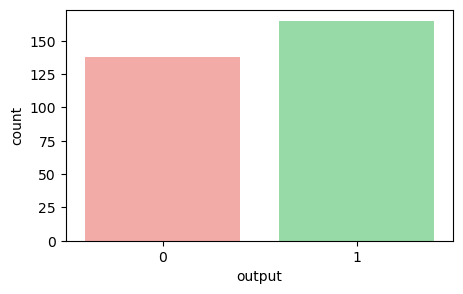

In [13]:
plt.figure(figsize=(5, 3))
sns.countplot(x=df["output"], palette=['#ff9f9b', '#8de5a1'])

<Axes: >

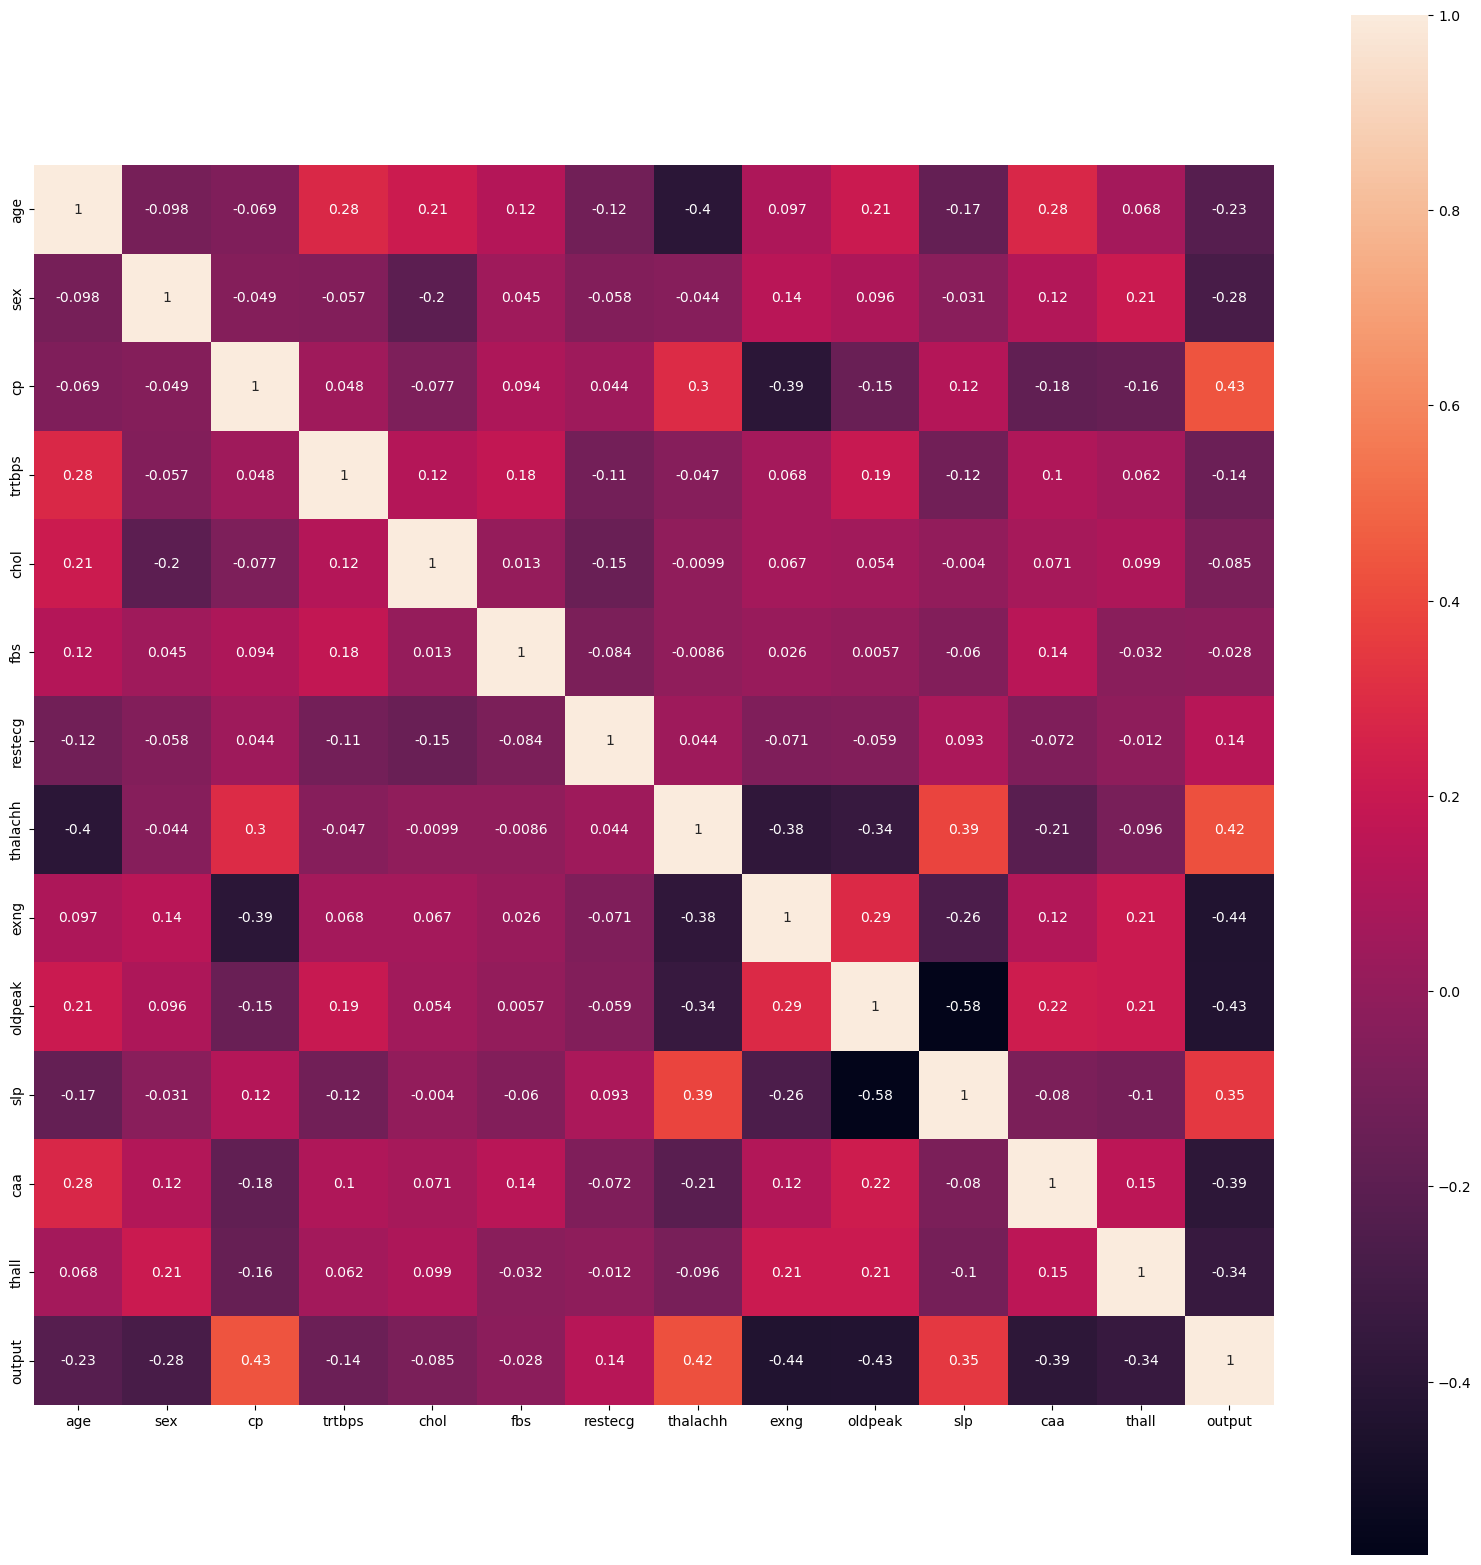

In [14]:
corrmat = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, annot_kws={"size":10}, square=True)

In [15]:
cols = ['#ff9f9b', '#8de5a1']

In [16]:
#d = df["output"].astype(str)

Text(0.5, 1.0, 'Distribution Of Age')

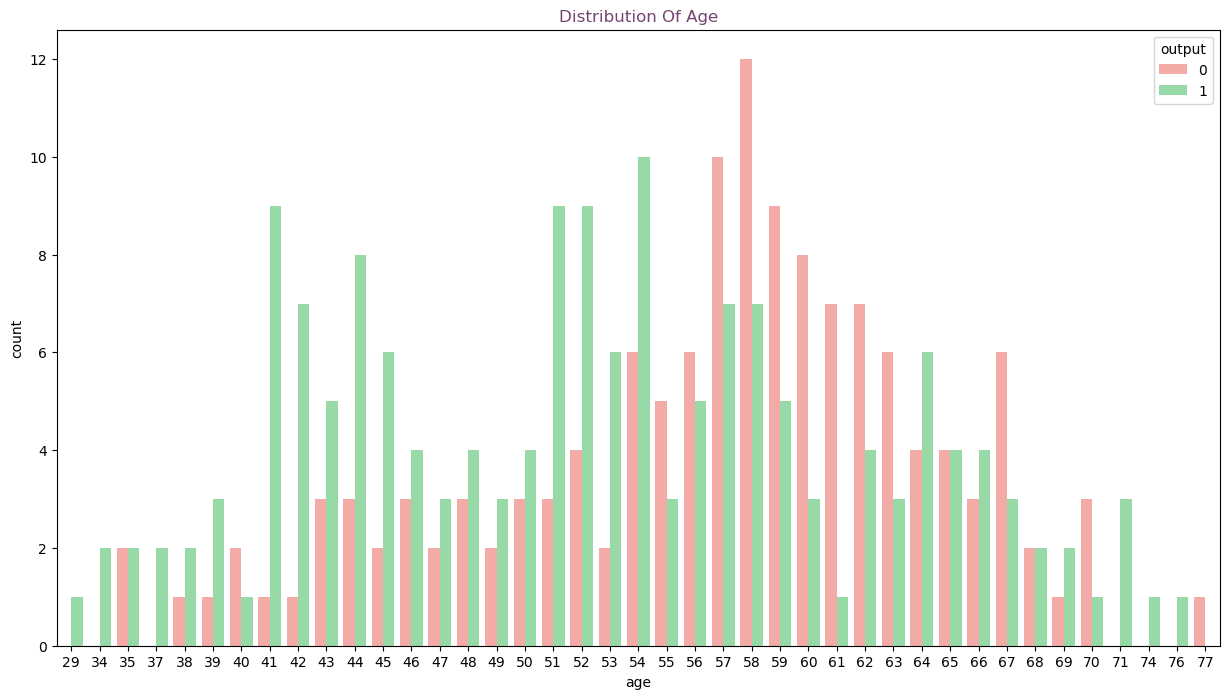

In [17]:
plt.figure(figsize=(15, 8))
age_output=sns.countplot(data=df, x=df["age"], hue="output", palette=cols)
age_output.set_title("Distribution Of Age", color="#774571")

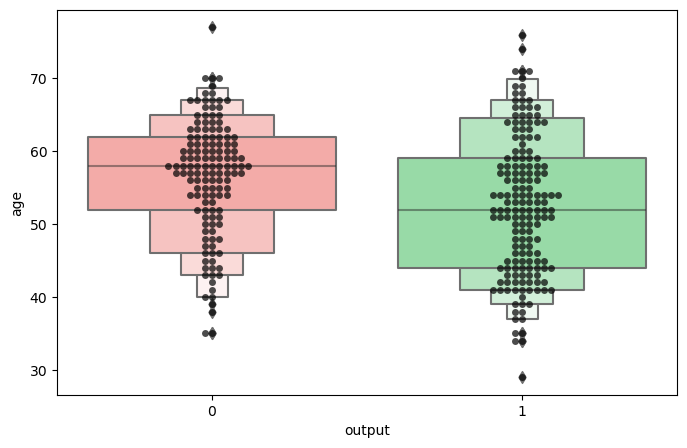

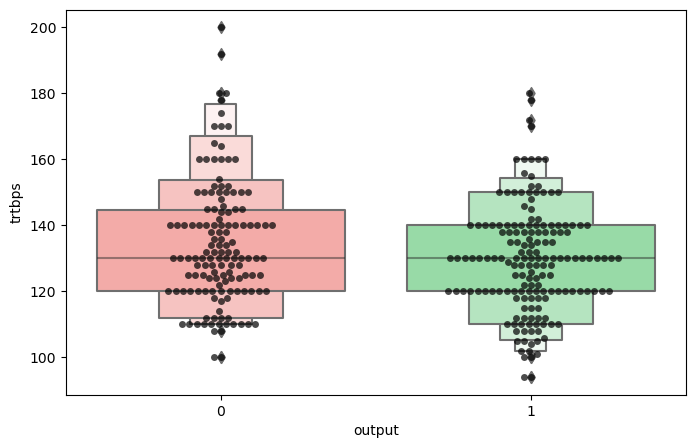

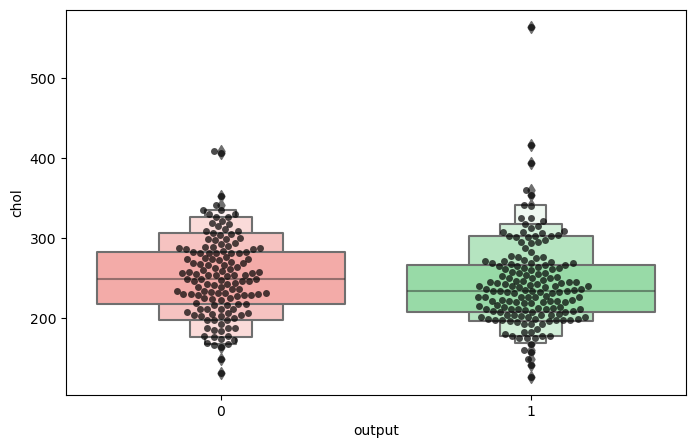

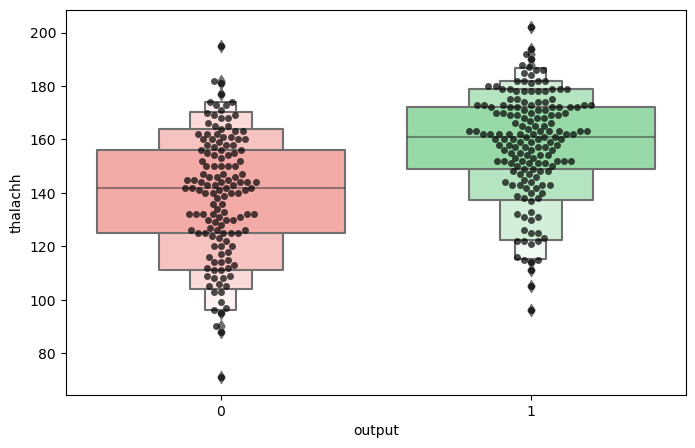

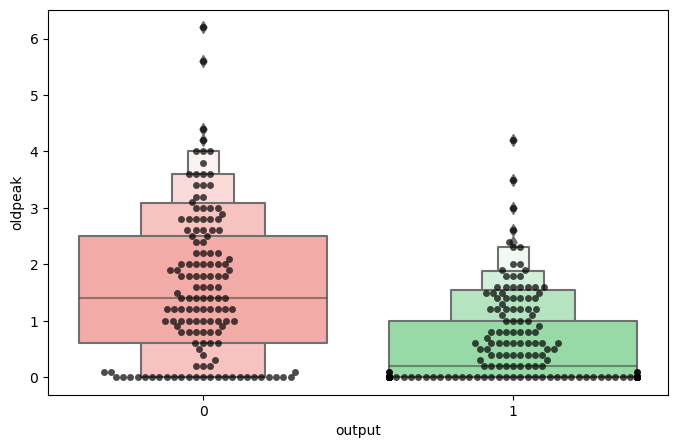

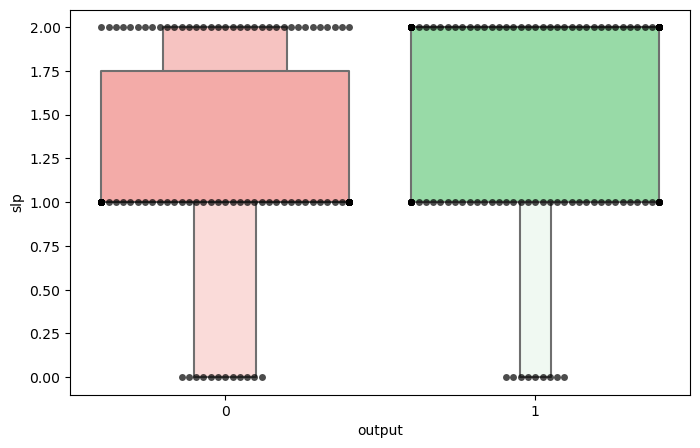

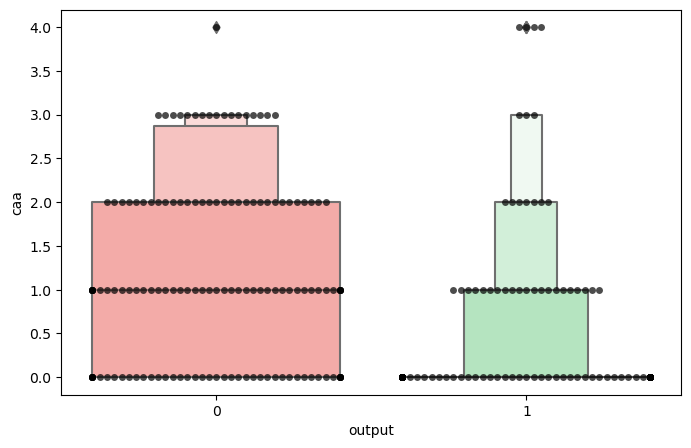

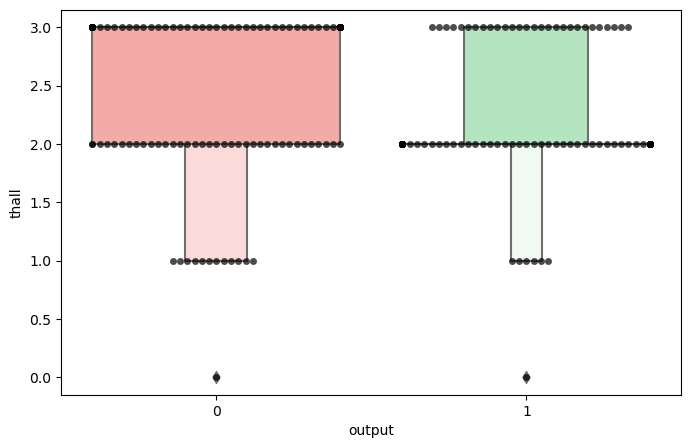

In [18]:
features = ["age", "trtbps", "chol", "thalachh", "oldpeak", "slp", "caa", "thall"]

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.swarmplot(x=df["output"], y=df[feature], color="black", alpha=0.7)
    sns.boxenplot(x=df["output"], y=df[feature], palette=cols)
    plt.show()

<Axes: xlabel='thalachh', ylabel='age'>

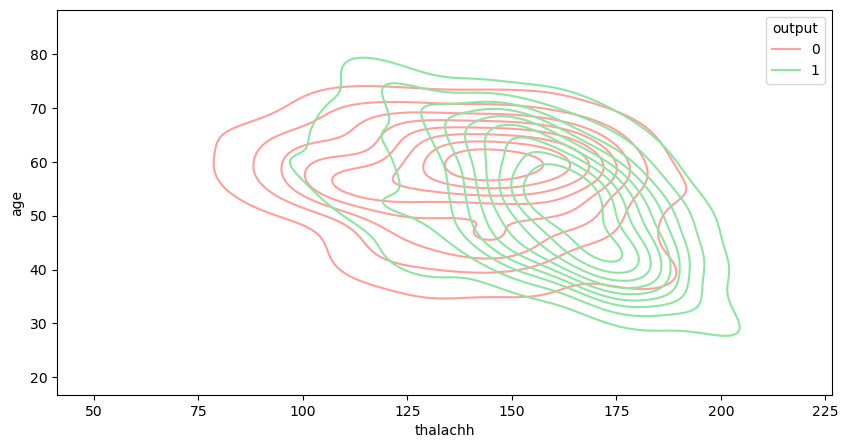

In [19]:
plt.figure(figsize=(10, 5))
sns.kdeplot(x=df["thalachh"], y=df["age"], hue=df["output"], palette=cols)

In [20]:
x = df.drop(["output"], axis=1).values
y = df["output"].values

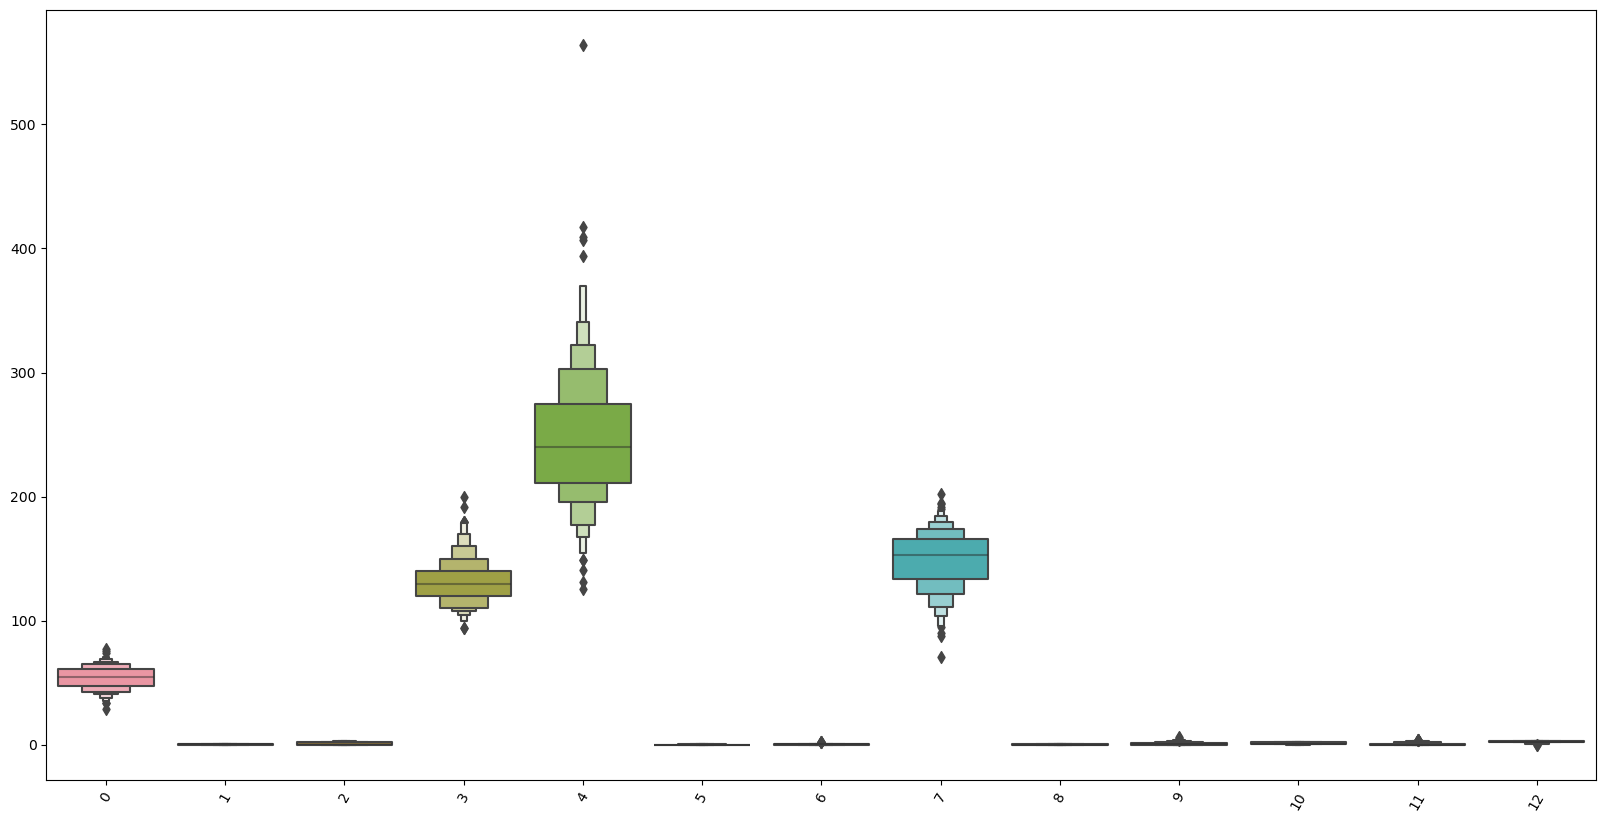

In [21]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=x)
plt.xticks(rotation=60)
plt.show()

In [22]:
pss = preprocessing.StandardScaler()
x = pss.fit_transform(x)

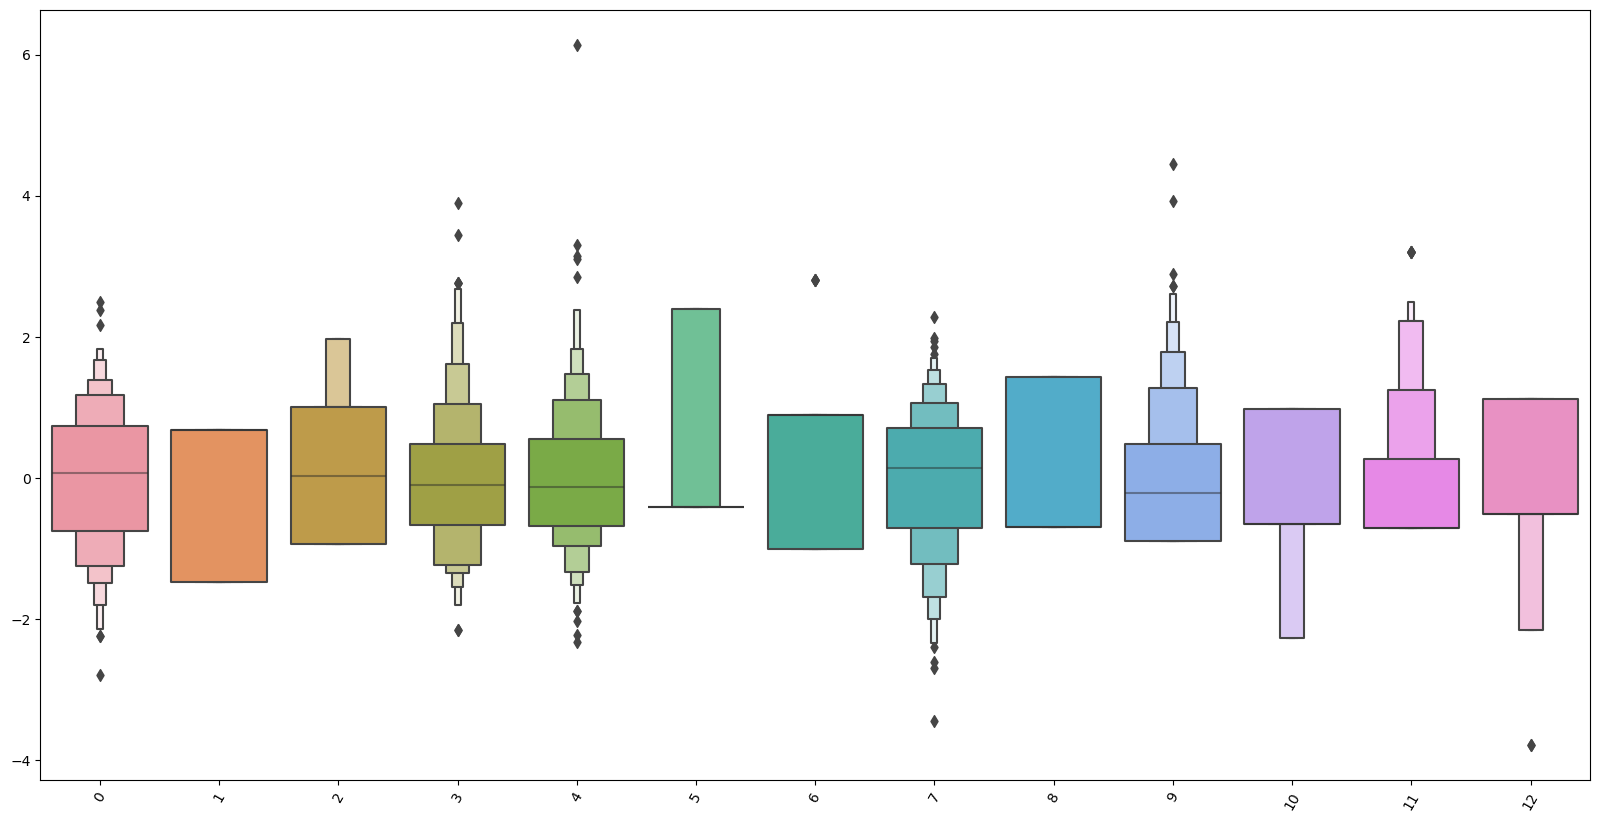

In [23]:
plt.figure(figsize=(20, 10))
sns.boxenplot(data=x)
plt.xticks(rotation=60)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("size of train set", x_train.shape, y_train.shape)
print("size of test set", x_test.shape, y_test.shape)

size of train set (242, 13) (242,)
size of test set (61, 13) (61,)


# *******************************************************************************

In [25]:
from sklearn import svm
model1 = svm.SVC()
model1.fit(x_train, y_train)

SVC()

In [26]:
y_hat = model1.predict(x_test)

In [27]:
print(y_test[0:10])
print(y_hat[0:10])

[0 0 1 0 1 1 1 0 0 1]
[0 0 1 0 1 1 1 0 0 1]


In [28]:
acc = accuracy_score(y_test, y_hat)
lls = log_loss(y_test, y_hat)
jac = jaccard_score(y_test, y_hat, pos_label=0)
cnf = confusion_matrix(y_test, y_hat, labels=[0,1])
cla = classification_report(y_test, y_hat)

In [29]:
print("accuracy:", acc)
print("log_loss:", lls)
print("jaccard_score", jac)

accuracy: 0.8688524590163934
log_loss: 4.727036510048151
jaccard_score 0.7647058823529411


In [30]:
import itertools
def pcm(cm, classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[26  3]
 [ 5 27]]


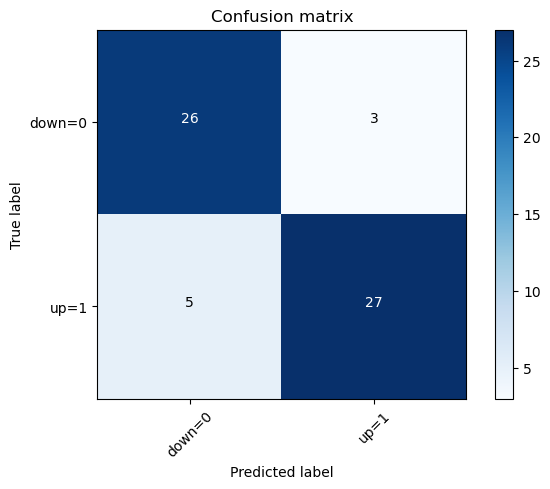

In [31]:
pcm(cnf, classes=["down=0", "up=1"])

In [32]:
print("classification_report:\n", cla)

classification_report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

